# Практика в компании "Бюро национальной статистики - Департамент контроля качества данных"

## Казахстанский филиал Московского Государственного университета имени М. В. Ломоносова

### Практикант: Черкасов Борис Юрьевич

Аналогичный вариант анализа данных по исследованию демографических и регистрационных данных, но только теперь мужчин, прибывших и зарегистрированных в системе регистрации населения (СРН) по ИИН женщины.

In [47]:
# Подключение библиотек для анализа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import geopandas as gp

import missingno as msno
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [48]:
import plotly.io as pio
pio.renderers.default = 'browser'  # откроется в браузере

In [49]:
pio.renderers  # покажет список доступных

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [50]:
# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Загрузка Excel-файла
file_path = "РПДРН_ГБД_ФЛ/Т8_РПДРН_прибытие_по иин мужчина а по гендеру женщина в СРН 2.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('Export Worksheet')
df.columns = [col.lower() for col in df.columns]

# Посмотрим на данные
df.head()

,иин,номер_удл,дата_удл,национальность,пол,пол_1,возраст_на_момент_под_заяв,дата_рождения,код_причина_регистрации,код_страны_прибытия,...,death_date,bp_address,dp_address,nationality,citizenship,status,email,nationality_ds,gender,gender_name
0,90911555287,NaN,NaN,5,F,Женщина,14.991,11.09.09,1,398,...,NaT,226464,NaN,39365,19718361,9,NaN,NaN,43037,Женщина
1,811213300317,50594381.0,27.04.22,5,F,Женщина,42.991,13.12.81,2,398,...,NaT,228162,NaN,39365,19718361,1,NaN,NaN,43037,Женщина
2,890820350078,58547654.0,15.07.24,5,F,Женщина,34.961,20.08.89,1,398,...,NaT,337166,NaN,39365,19718361,1,NaN,NaN,43037,Женщина
3,70726550584,56134694.0,22.08.23,5,F,Женщина,17.039,26.07.07,2,398,...,NaT,226664,NaN,39365,19718361,1,NaN,NaN,43037,Женщина
4,780109302585,40843992.0,29.02.16,5,F,Женщина,46.082,09.01.78,4,398,...,NaT,228199,NaN,39365,19718361,1,NaN,NaN,43037,Женщина


In [51]:
# Какие есть столбцы
df.columns

Index(['иин', 'номер_удл', 'дата_удл', 'национальность', 'пол', 'пол_1',
       'возраст_на_момент_под_заяв', 'дата_рождения',
       'код_причина_регистрации', 'код_страны_прибытия', 'код_область_м_ж',
       'код_район_м_ж', 'нас_пункт_м_ж', 'улица_м_ж', 'дом_м_ж', 'корпус_м_ж',
       'кв_м_ж', 'рка_м_ж', 'дата_прибытия', 'код_преж_страна',
       'код_преж_область_м_ж', 'код_преж_район_м_ж', 'преж_нас_пункт_м_ж',
       'преж_улица_м_ж', 'преж_дом_м_ж', 'преж_корпус_м_ж', 'преж_кв_м_ж',
       'преж_рка_м_ж', 'дата_выбытия', 'код_цель_прибытия',
       'код_семейное_положение', 'код_уровень_образование',
       'код_спец_по_образованию', 'код_положение_в_занятости', 'система',
       'тип_услуги', 'id', 'source_id', 'person_id', 'iin', 'l_name', 'f_name',
       'm_name', 'birth_date', 'death_date', 'bp_address', 'dp_address',
       'nationality', 'citizenship', 'status', 'email', 'nationality_ds',
       'gender', 'gender_name'],
      dtype='object')

#### Предварительный анализ

In [52]:
# Посмотрим на столбцы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   иин                         1795 non-null   int64         
 1   номер_удл                   1642 non-null   float64       
 2   дата_удл                    1642 non-null   object        
 3   национальность              1795 non-null   int64         
 4   пол                         1795 non-null   object        
 5   пол_1                       1795 non-null   object        
 6   возраст_на_момент_под_заяв  1795 non-null   float64       
 7   дата_рождения               1795 non-null   object        
 8   код_причина_регистрации     1795 non-null   int64         
 9   код_страны_прибытия         1795 non-null   int64         
 10  код_область_м_ж             1795 non-null   int64         
 11  код_район_м_ж               1795 non-null   int64       

In [53]:
# Посмотрим на числовые характеристики
df.describe()

,иин,номер_удл,национальность,возраст_на_момент_под_заяв,код_причина_регистрации,код_страны_прибытия,код_область_м_ж,код_район_м_ж,рка_м_ж,код_преж_страна,...,birth_date,death_date,bp_address,dp_address,nationality,citizenship,status,email,nationality_ds,gender
count,1.795000e+03,1.642000e+03,1795.000000,1795.000000,1795.000000,1795.0,1795.000000,1795.000000,1.795000e+03,1782.000000,...,1795,4,1.795000e+03,0.0,1795.000000,1.795000e+03,1795.000000,0.0,71.000000,1795.000000
mean,4.674853e+11,4.945040e+07,56.718106,33.893474,2.779944,398.0,1927.149304,429.876323,7.831967e+14,398.206510,...,1992-06-08 12:14:02.339832960,2025-01-01 18:00:00,2.855370e+06,NaN,39368.707521,1.971836e+07,1.007799,NaN,2.112676,43036.990529
min,1.115009e+08,3.025795e+06,1.000000,14.000000,1.000000,398.0,1902.000000,64.000000,2.013000e+14,276.000000,...,1950-02-13 00:00:00,2024-06-11 00:00:00,2.264640e+05,NaN,39361.000000,1.971836e+07,0.000000,NaN,2.000000,43036.000000
25%,8.040855e+10,4.444142e+07,5.000000,17.001000,2.000000,398.0,1910.000000,137.000000,2.013003e+14,398.000000,...,1977-10-31 12:00:00,2024-12-26 18:00:00,2.266880e+05,NaN,39365.000000,1.971836e+07,1.000000,NaN,2.000000,43037.000000
50%,5.805203e+11,5.146694e+07,5.000000,26.970000,3.000000,398.0,1917.000000,294.000000,1.201300e+15,398.000000,...,1998-08-08 00:00:00,2025-03-09 00:00:00,2.302140e+05,NaN,39365.000000,1.971836e+07,1.000000,NaN,2.000000,43037.000000
75%,8.012168e+11,5.659226e+07,5.000000,48.009500,4.000000,398.0,1945.000000,738.000000,1.201500e+15,398.000000,...,2007-09-25 12:00:00,2025-03-15 00:00:00,3.371660e+05,NaN,39365.000000,1.971836e+07,1.000000,NaN,2.000000,43037.000000
max,9.912243e+11,6.033831e+07,999.000000,88.981000,5.000000,398.0,1963.000000,797.000000,1.202400e+15,643.000000,...,2049-07-30 00:00:00,2025-03-15 00:00:00,2.458198e+07,NaN,39491.000000,1.971849e+07,9.000000,NaN,4.000000,43037.000000
std,3.731924e+11,9.352517e+06,213.033360,18.233202,1.001136,0.0,20.848714,288.836370,4.934903e+14,8.701746,...,NaN,NaN,5.197719e+06,NaN,20.590982,4.624924e+00,0.273190,NaN,0.464429,0.096883


In [54]:
# Посмотрим на пропуски
df.isna().sum()

иин                              0
номер_удл                      153
дата_удл                       153
национальность                   0
пол                              0
пол_1                            0
возраст_на_момент_под_заяв       0
дата_рождения                    0
код_причина_регистрации          0
код_страны_прибытия              0
код_область_м_ж                  0
код_район_м_ж                    0
нас_пункт_м_ж                 1163
улица_м_ж                        0
дом_м_ж                          0
корпус_м_ж                    1741
кв_м_ж                         751
рка_м_ж                          0
дата_прибытия                    0
код_преж_страна                 13
код_преж_область_м_ж            13
код_преж_район_м_ж              12
преж_нас_пункт_м_ж            1006
преж_улица_м_ж                  25
преж_дом_м_ж                    39
преж_корпус_м_ж               1744
преж_кв_м_ж                    882
преж_рка_м_ж                    43
дата_выбытия        

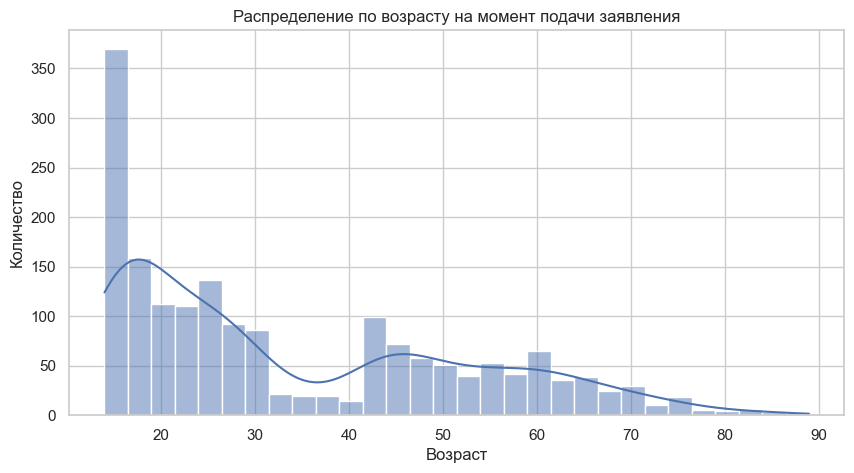

In [55]:
# Распределение по возрасту
sns.histplot(df['возраст_на_момент_под_заяв'], bins=30, kde=True)
plt.title('Распределение по возрасту на момент подачи заявления')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

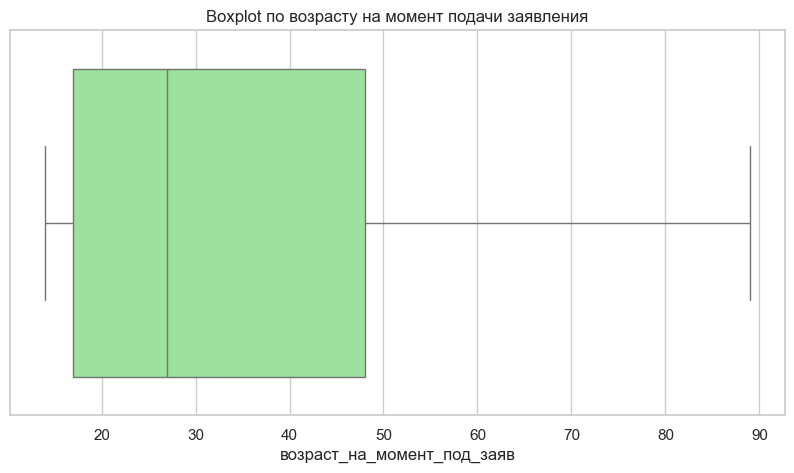

In [56]:
# Посмотрим, есть ли аномалии
sns.boxplot(x=df['возраст_на_момент_под_заяв'], color='lightgreen')
plt.title("Boxplot по возрасту на момент подачи заявления")
plt.show()

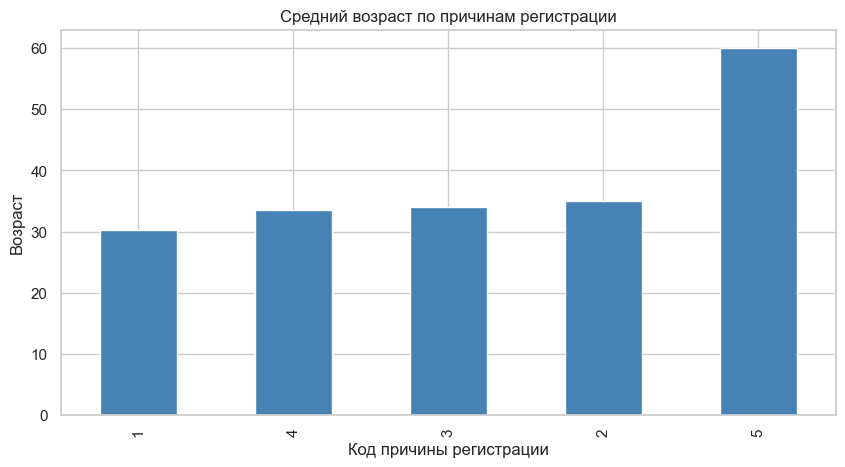

In [57]:
# Посмотрим на возраст по причинам регистрации
df.groupby('код_причина_регистрации')['возраст_на_момент_под_заяв'].mean().sort_values().plot(kind='bar', color='steelblue')
plt.title('Средний возраст по причинам регистрации')
plt.ylabel('Возраст')
plt.xlabel('Код причины регистрации')
plt.show()

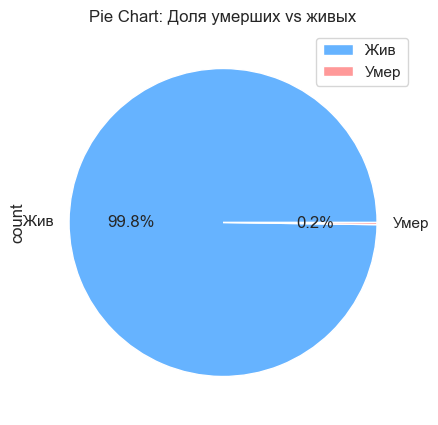

In [58]:
df['status'] = df['death_date'].isna().map({True: 'Жив', False: 'Умер'})
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Pie Chart: Доля умерших vs живых")
plt.legend(loc='best')
plt.show()

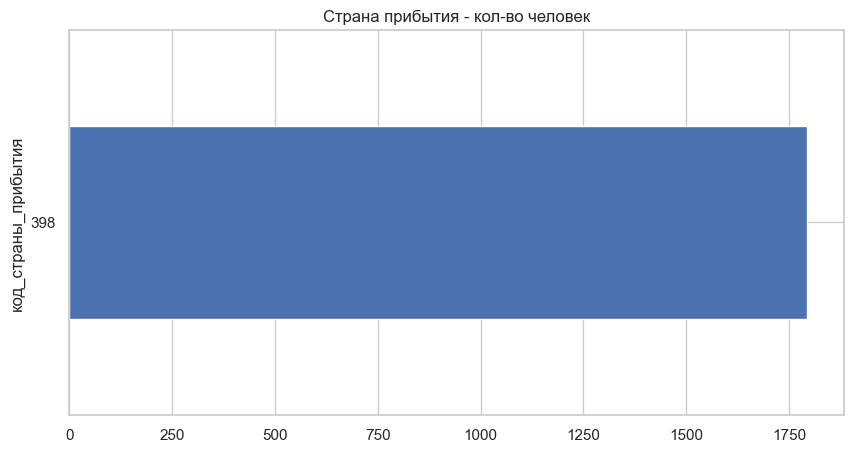

In [59]:
# Страна прибытия единственная - закодирована под кодом 398
df['код_страны_прибытия'].value_counts().head(10).plot(kind='barh')
plt.title("Страна прибытия - кол-во человек")
plt.show()

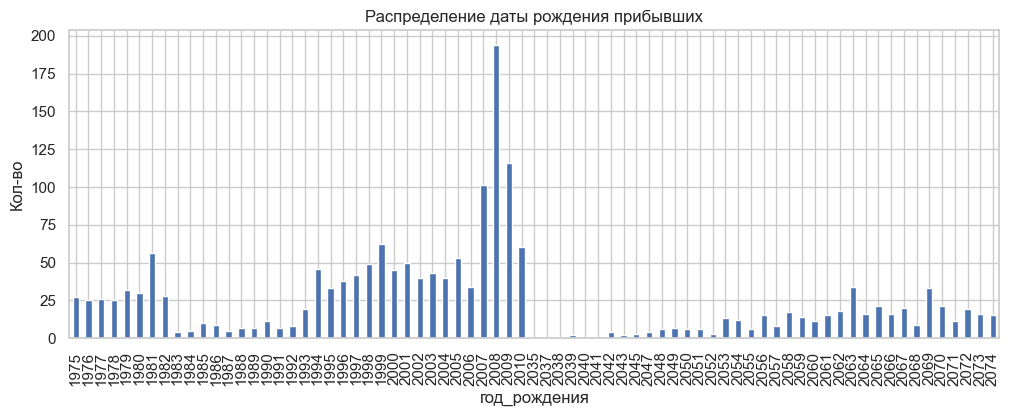

In [60]:
# Дата рождения
plt.figure(figsize=(12, 6))
df['год_рождения'] = pd.to_datetime(df['дата_рождения'], errors='coerce').dt.year
df['год_рождения'].value_counts().sort_index().plot(kind='bar', figsize=(12,4))
plt.ylabel("Кол-во")
plt.title("Распределение даты рождения прибывших")
plt.show()

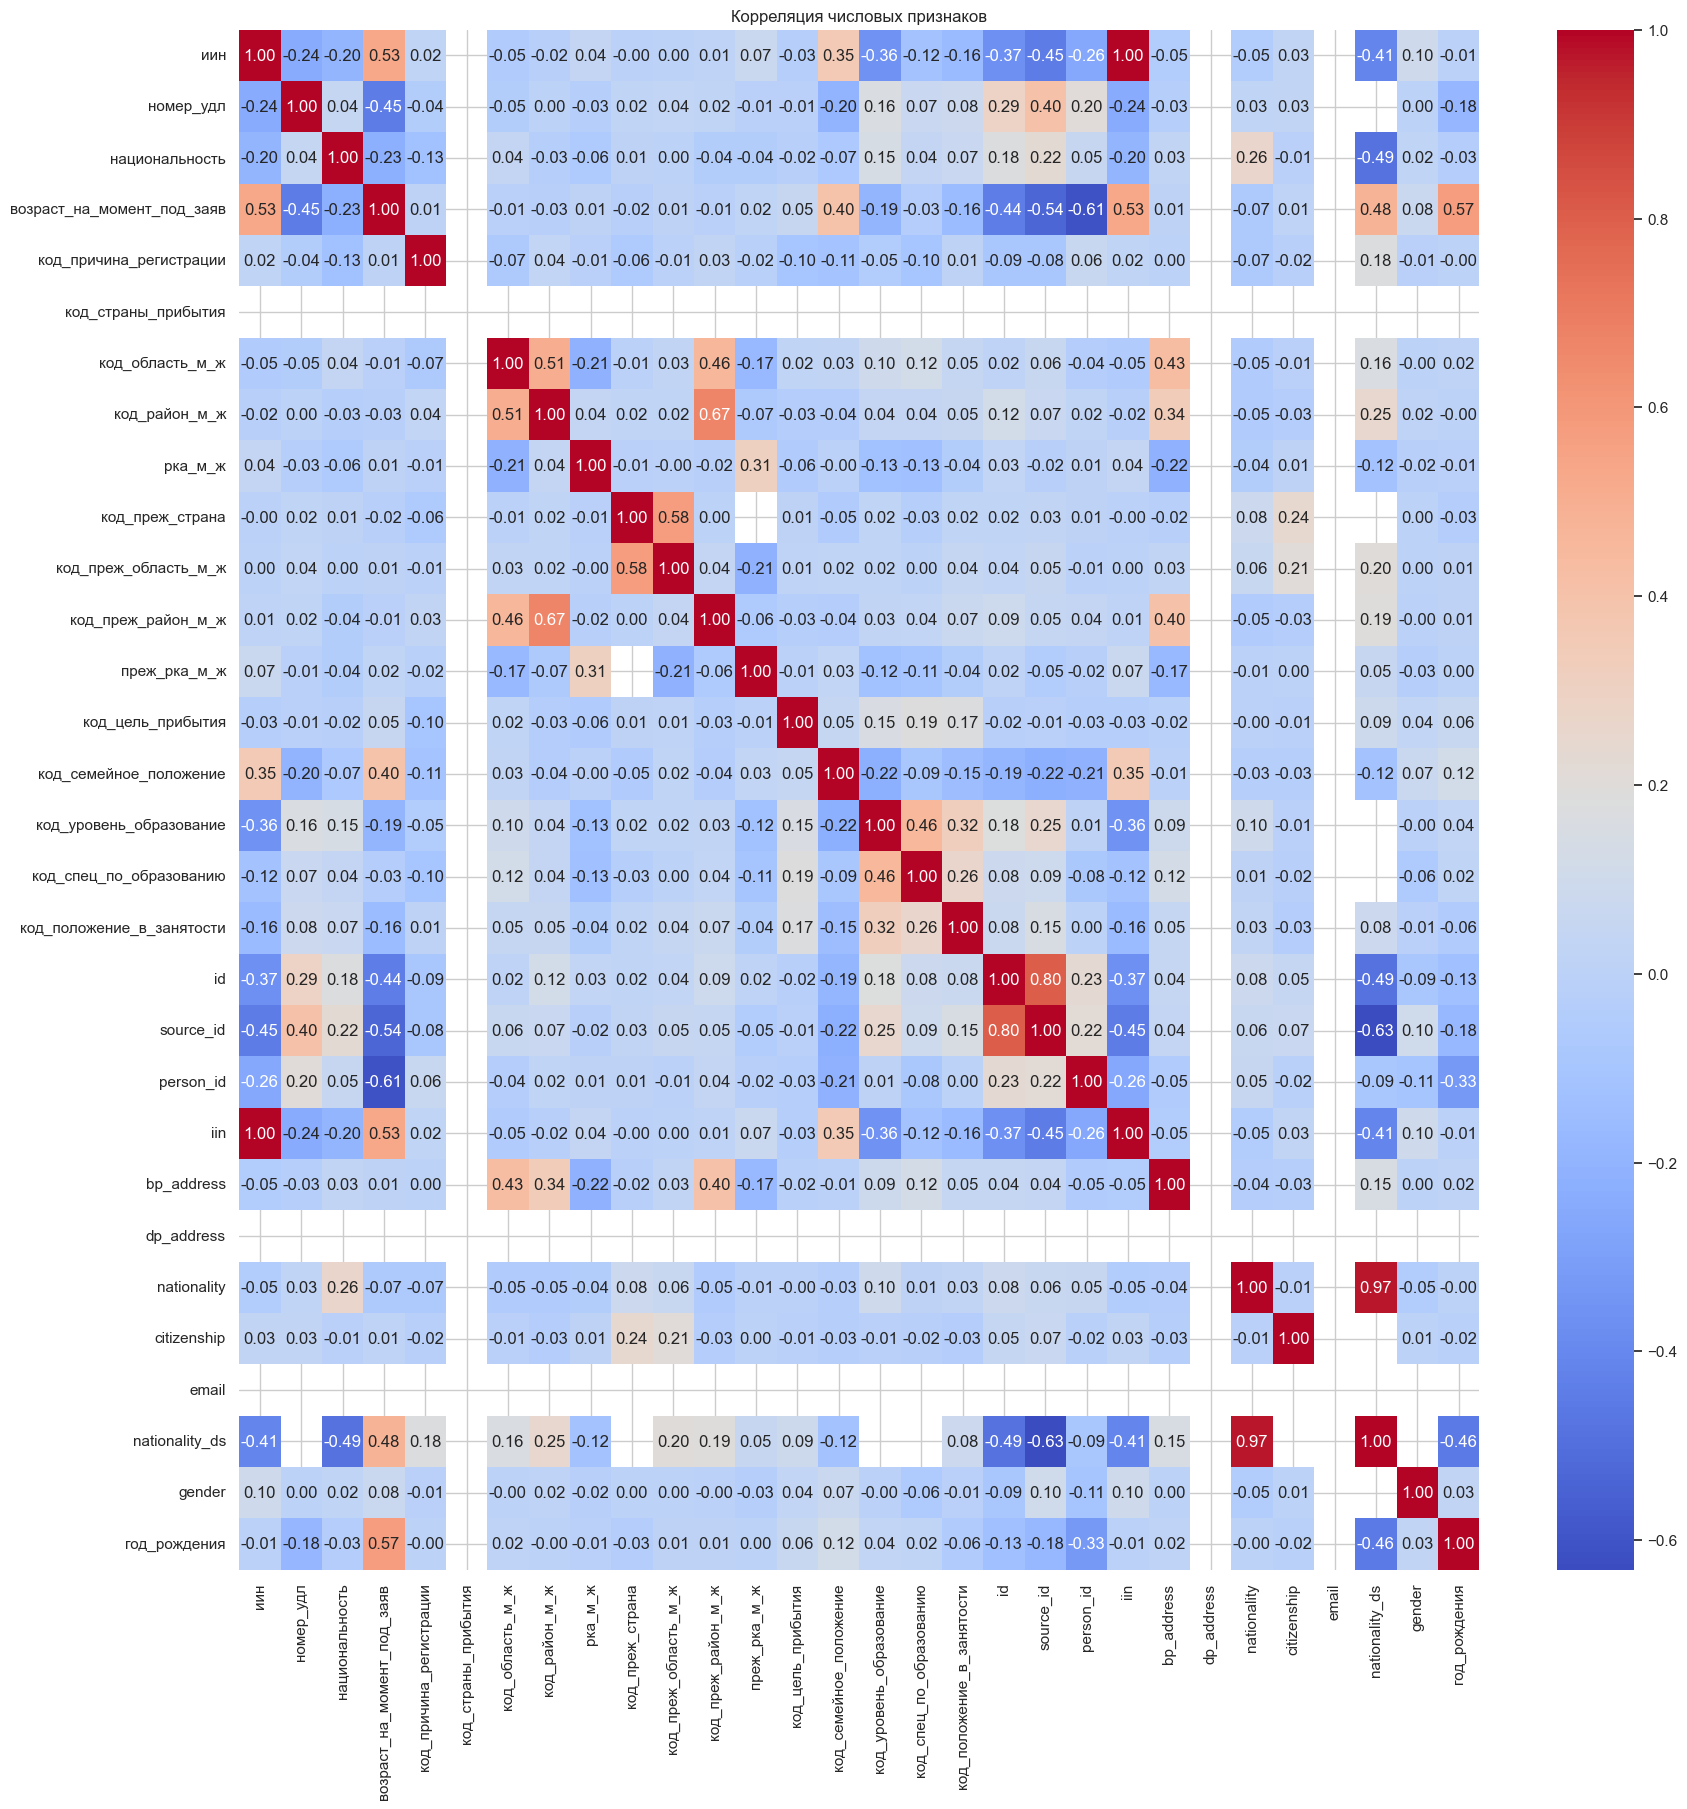

In [61]:
# Посмотрим на корреляцию переменных
plt.figure(figsize=(20, 20))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция числовых признаков')
plt.show()

In [62]:
df.columns

Index(['иин', 'номер_удл', 'дата_удл', 'национальность', 'пол', 'пол_1',
       'возраст_на_момент_под_заяв', 'дата_рождения',
       'код_причина_регистрации', 'код_страны_прибытия', 'код_область_м_ж',
       'код_район_м_ж', 'нас_пункт_м_ж', 'улица_м_ж', 'дом_м_ж', 'корпус_м_ж',
       'кв_м_ж', 'рка_м_ж', 'дата_прибытия', 'код_преж_страна',
       'код_преж_область_м_ж', 'код_преж_район_м_ж', 'преж_нас_пункт_м_ж',
       'преж_улица_м_ж', 'преж_дом_м_ж', 'преж_корпус_м_ж', 'преж_кв_м_ж',
       'преж_рка_м_ж', 'дата_выбытия', 'код_цель_прибытия',
       'код_семейное_положение', 'код_уровень_образование',
       'код_спец_по_образованию', 'код_положение_в_занятости', 'система',
       'тип_услуги', 'id', 'source_id', 'person_id', 'iin', 'l_name', 'f_name',
       'm_name', 'birth_date', 'death_date', 'bp_address', 'dp_address',
       'nationality', 'citizenship', 'status', 'email', 'nationality_ds',
       'gender', 'gender_name', 'год_рождения'],
      dtype='object')

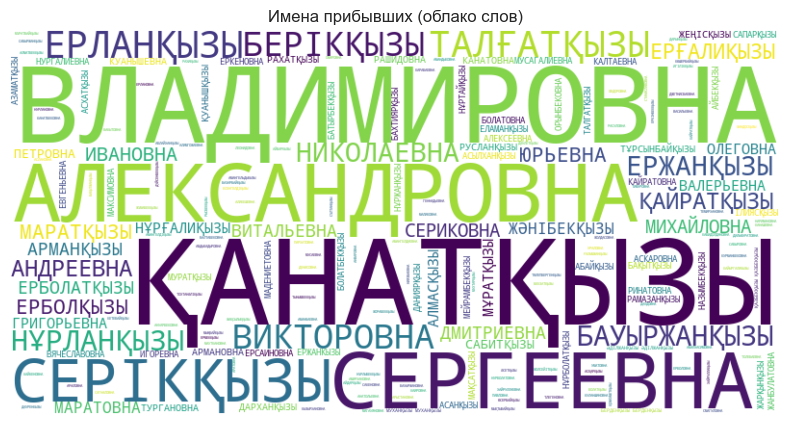

In [63]:
# Облако слов
df = xls.parse('Export Worksheet')
df.columns = [col.lower() for col in df.columns]

from wordcloud import WordCloud

text = " ".join(df["m_name"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Имена прибывших (облако слов)")
plt.show()


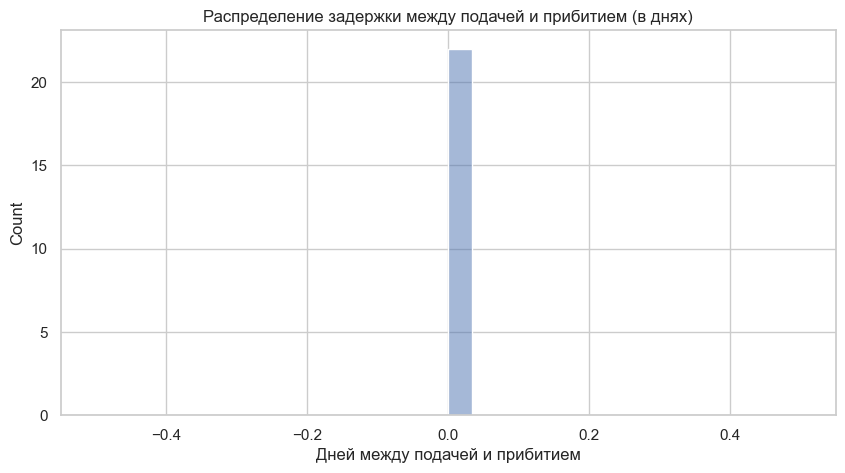

In [64]:
# Время между подачей и прибитием
df["дата_прибытия"] = pd.to_datetime(df["дата_прибытия"], errors="coerce")
df["дата_выбытия"] = pd.to_datetime(df["дата_выбытия"], errors="coerce")

df["delay_days"] = (df["дата_прибытия"] - df["дата_выбытия"]).dt.days
sns.histplot(df["delay_days"].dropna(), bins=30, kde=True)
plt.title("Распределение задержки между подачей и прибитием (в днях)")
plt.xlabel("Дней между подачей и прибитием")
plt.show()

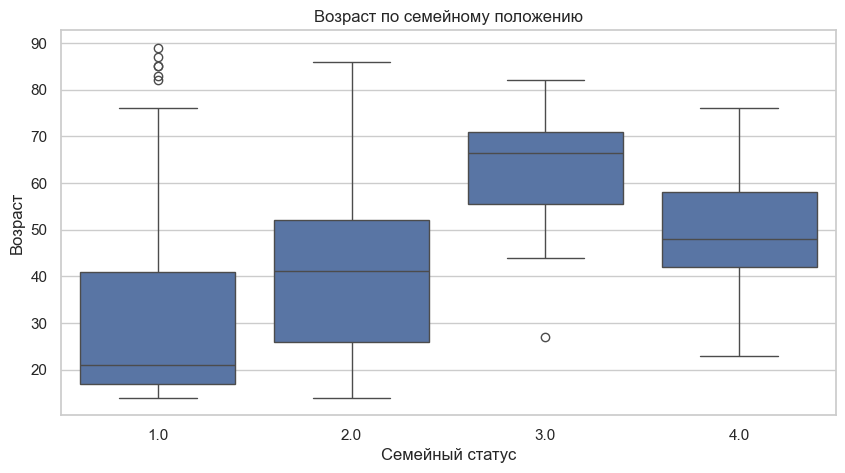

In [65]:
# Проверка на аномалии по семейному статусу
sns.boxplot(x="код_семейное_положение", y="возраст_на_момент_под_заяв", data=df)
plt.title("Возраст по семейному положению")
plt.xlabel("Семейный статус")
plt.ylabel("Возраст")
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   иин                         1795 non-null   int64         
 1   номер_удл                   1642 non-null   float64       
 2   дата_удл                    1642 non-null   object        
 3   национальность              1795 non-null   int64         
 4   пол                         1795 non-null   object        
 5   пол_1                       1795 non-null   object        
 6   возраст_на_момент_под_заяв  1795 non-null   float64       
 7   дата_рождения               1795 non-null   object        
 8   код_причина_регистрации     1795 non-null   int64         
 9   код_страны_прибытия         1795 non-null   int64         
 10  код_область_м_ж             1795 non-null   int64         
 11  код_район_м_ж               1795 non-null   int64       

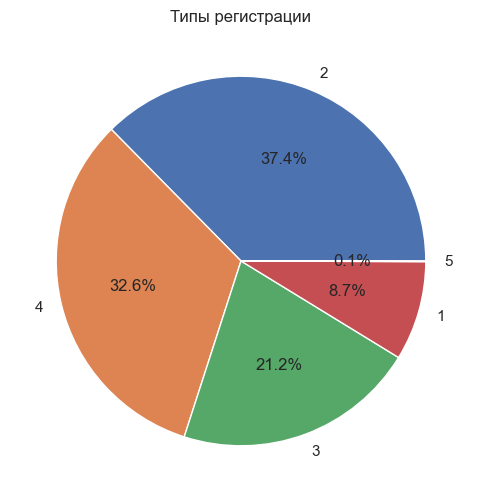

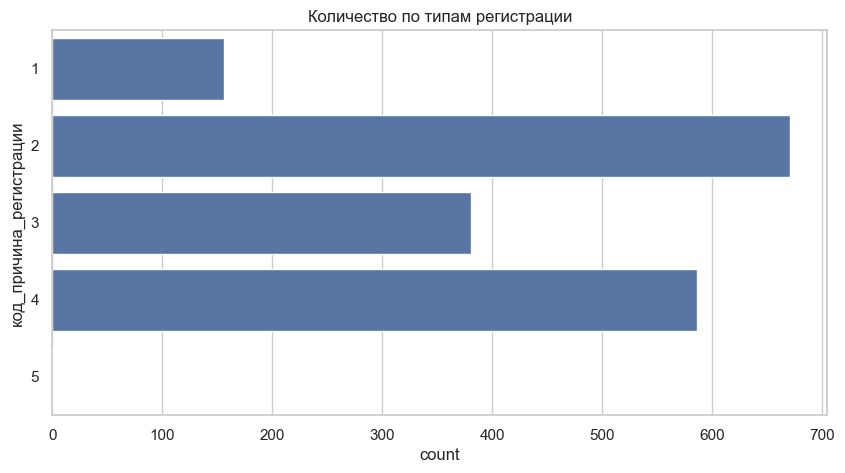

In [67]:
reg_counts = df["код_причина_регистрации"].value_counts()

# Pie Chart
reg_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Типы регистрации")
plt.ylabel("")
plt.show()

# Bar Chart
sns.countplot(y="код_причина_регистрации", data=df)
plt.title("Количество по типам регистрации")
plt.show()

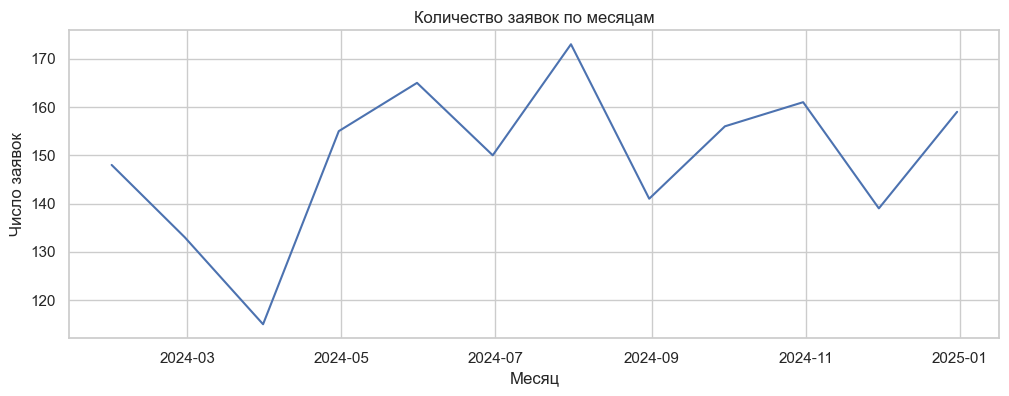

In [68]:
df['дата_прибытия'] = pd.to_datetime(df['дата_прибытия'])
monthly_counts = df.resample('M', on='дата_прибытия').size()

plt.figure(figsize=(12, 4))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Количество заявок по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Число заявок")
plt.grid(True)
plt.show()

Нижний код можно запустить, чтобы получить интерактивный график на веб-странице, ниже прикреплено фото графика.

In [69]:
from plotly.colors import DEFAULT_PLOTLY_COLORS

# Пример: 'национальность', 'цель_прибытия', 'тип_регистрации'
df_sankey = df[["национальность", "код_цель_прибытия", "код_причина_регистрации"]].dropna()

# Подготовка узлов
all_nodes = list(pd.unique(df_sankey.values.ravel()))
node_indices = {k: v for v, k in enumerate(all_nodes)}

# Создание потоков
links = df_sankey.groupby(["национальность", "код_цель_прибытия"]).size().reset_index(name="value")
links["source"] = links["национальность"].map(node_indices)
links["target"] = links["код_цель_прибытия"].map(node_indices)

# Вторая часть: цель → тип
links2 = df_sankey.groupby(["код_цель_прибытия", "код_причина_регистрации"]).size().reset_index(name="value")
links2["source"] = links2["код_цель_прибытия"].map(node_indices)
links2["target"] = links2["код_причина_регистрации"].map(node_indices)

# Объединение
all_links = pd.concat([links, links2], ignore_index=True)

fig = go.Figure(data=[go.Sankey(
    node=dict(label=all_nodes, pad=15, thickness=15, color=DEFAULT_PLOTLY_COLORS),
    link=dict(source=all_links["source"], target=all_links["target"], value=all_links["value"])
)])
fig.update_layout(title_text="Sankey диаграмма", font_size=10)
fig.show()

In [70]:
# Интеракивный график страны подачи заявок - но у нас одна страна
country_counts = df["национальность"].value_counts().reset_index()
country_counts.columns = ["country", "count"]

fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    title="Количество заявок по странам",
                    color_continuous_scale="Viridis")
fig.show()

#### Анализ пропусков

=== Пропущенные значения (%): ===
dp_address                   100.000000
email                        100.000000
death_date                    99.777159
дата_выбытия                  98.774373
delay_days                    98.774373
преж_корпус_м_ж               97.158774
корпус_м_ж                    96.991643
nationality_ds                96.044568
нас_пункт_м_ж                 64.791086
преж_нас_пункт_м_ж            56.044568
преж_кв_м_ж                   49.136490
кв_м_ж                        41.838440
код_спец_по_образованию       17.883008
m_name                        12.813370
код_положение_в_занятости     11.253482
код_семейное_положение        11.253482
код_уровень_образование       11.253482
номер_удл                      8.523677
дата_удл                       8.523677
преж_рка_м_ж                   2.395543
преж_дом_м_ж                   2.172702
преж_улица_м_ж                 1.392758
код_преж_страна                0.724234
код_преж_область_м_ж           0.724234
код_пр

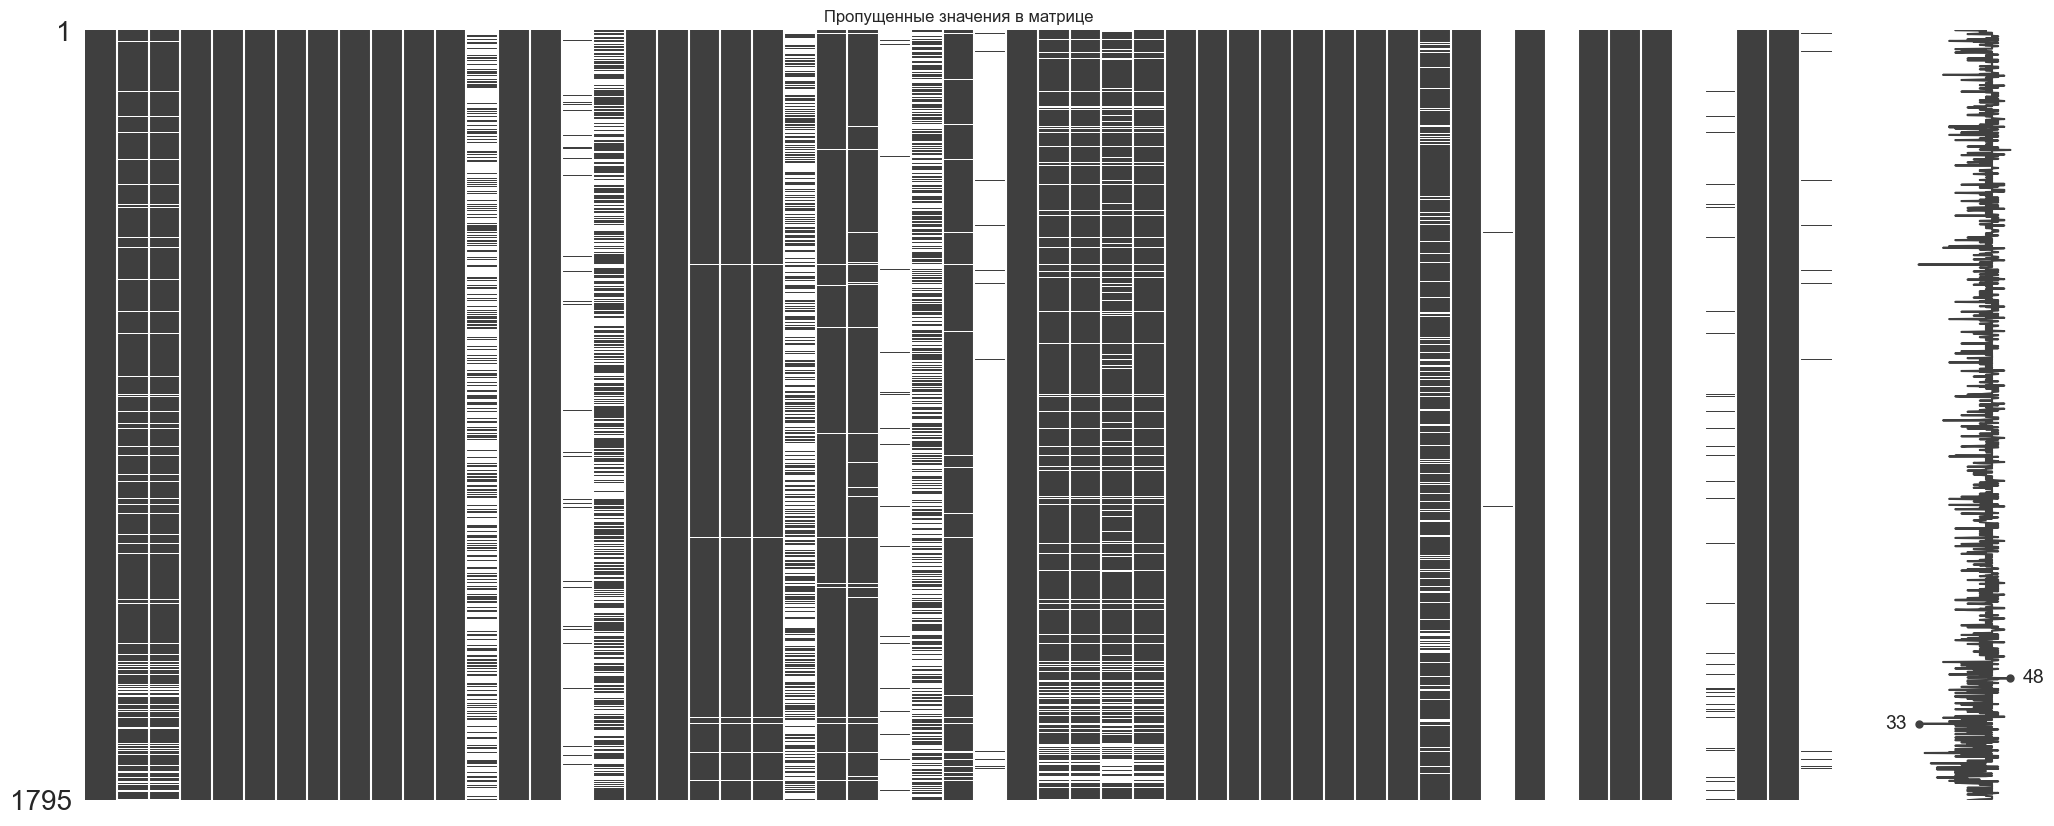

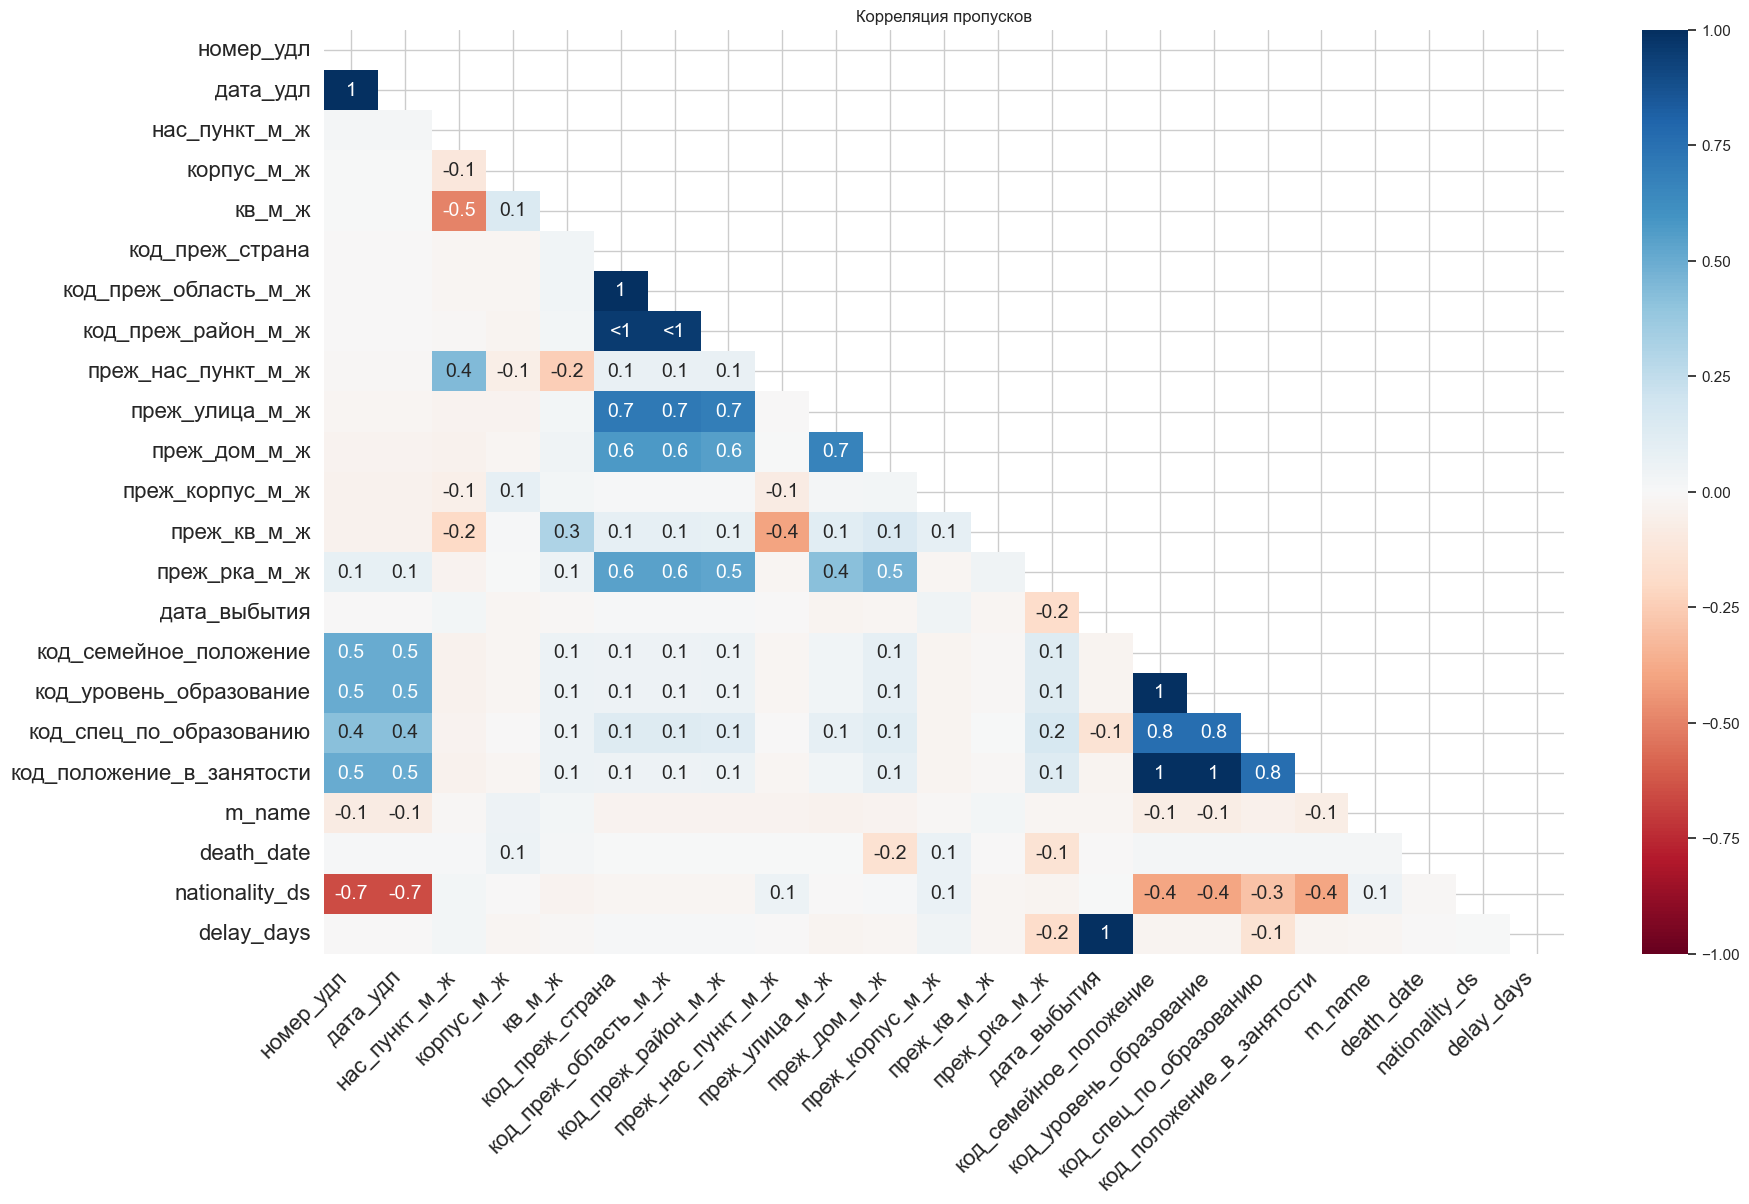

In [71]:
# -----------------------------
# Анализ пропусков
# -----------------------------
print("=== Пропущенные значения (%): ===")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Визуализация пропусков
msno.matrix(df)
plt.title("Пропущенные значения в матрице")
plt.show()

msno.heatmap(df)
plt.title("Корреляция пропусков")
plt.show()

Количество выбросов по возрасту (z > 3): 1


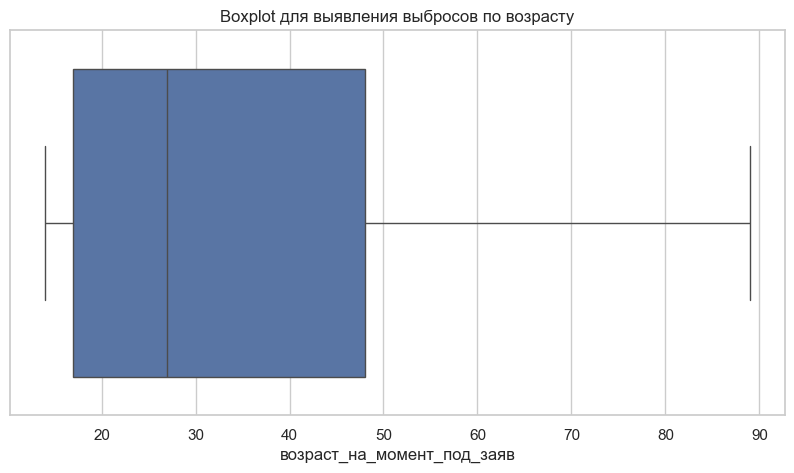

In [72]:
# -----------------------------
# Анализ выбросов по возрасту
# -----------------------------
df['z_age'] = zscore(df['возраст_на_момент_под_заяв'].fillna(df['возраст_на_момент_под_заяв'].median()))
outliers = df[df['z_age'].abs() > 3]
print(f"Количество выбросов по возрасту (z > 3): {len(outliers)}")

sns.boxplot(x=df['возраст_на_момент_под_заяв'])
plt.title('Boxplot для выявления выбросов по возрасту')
plt.show()

In [73]:
# Проверка на несоответствие - базовая
df[df['возраст_на_момент_под_заяв'] > 100]

,иин,номер_удл,дата_удл,национальность,пол,пол_1,возраст_на_момент_под_заяв,дата_рождения,код_причина_регистрации,код_страны_прибытия,...,dp_address,nationality,citizenship,status,email,nationality_ds,gender,gender_name,delay_days,z_age


In [74]:
# Общий подсчёт пропущенных значений
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Объединённый DataFrame для удобства
missing_df = pd.DataFrame({
    'Количество пропусков': missing_counts,
    'Процент пропусков (%)': missing_percent
})

# Фильтруем только столбцы с пропусками
missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values(by='Процент пропусков (%)', ascending=False)

# Вывод
missing_df.style.background_gradient(cmap='Reds').format({'Процент пропусков (%)': "{:.2f}"})


,Количество пропусков,Процент пропусков (%)
dp_address,1795,100.00
email,1795,100.00
death_date,1791,99.78
дата_выбытия,1773,98.77
delay_days,1773,98.77
преж_корпус_м_ж,1744,97.16
корпус_м_ж,1741,96.99
nationality_ds,1724,96.04
нас_пункт_м_ж,1163,64.79
преж_нас_пункт_м_ж,1006,56.04


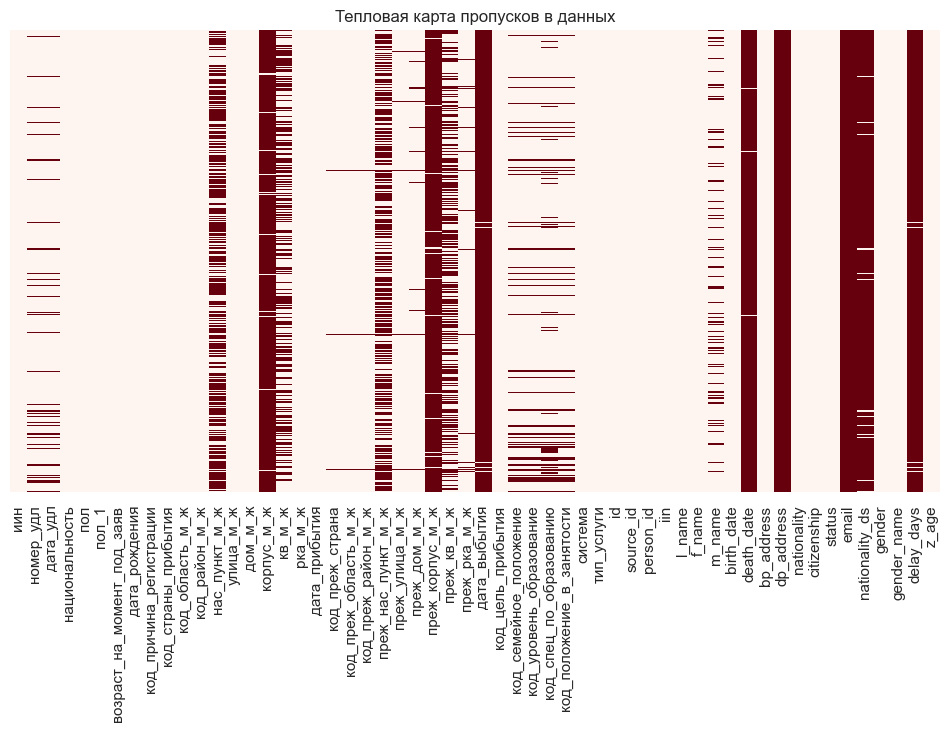

In [75]:
# Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Reds')
plt.title('Тепловая карта пропусков в данных')
plt.show()

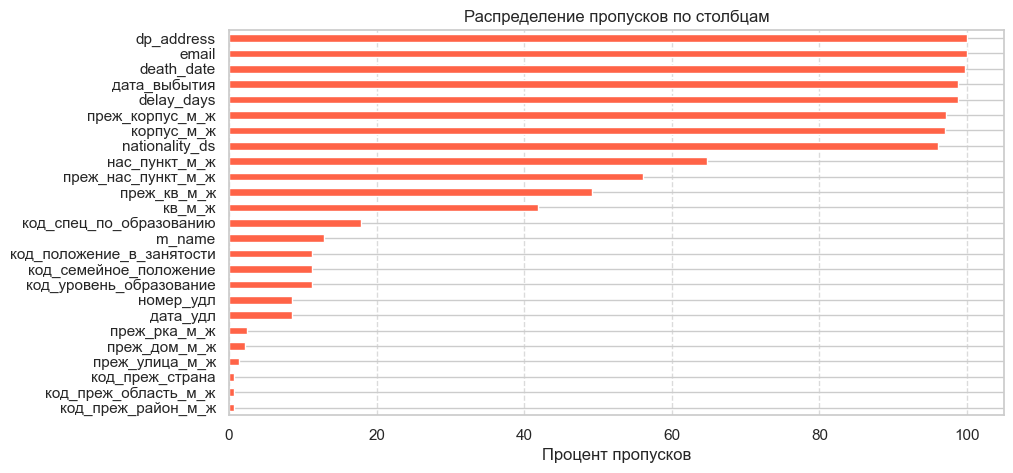

In [76]:
# Barchart пропусков
plt.figure(figsize=(10, 5))
missing_df['Процент пропусков (%)'].plot(kind='barh', color='tomato')
plt.xlabel("Процент пропусков")
plt.title("Распределение пропусков по столбцам")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

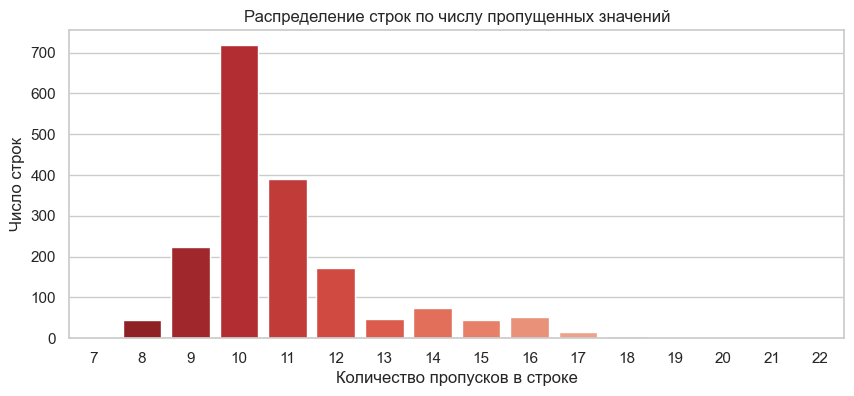

In [77]:
# Распределенеи строк по числу пропусков
df['Кол-во пропусков в строке'] = df.isnull().sum(axis=1)
row_missing_stats = df['Кол-во пропусков в строке'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=row_missing_stats.index, y=row_missing_stats.values, palette='Reds_r')
plt.xlabel('Количество пропусков в строке')
plt.ylabel('Число строк')
plt.title('Распределение строк по числу пропущенных значений')
plt.show()

# Удалим временный столбец
df.drop(columns='Кол-во пропусков в строке', inplace=True)

#### Продвинутый анализ качества заполнения пропусков

In [78]:
# Копия датасета для экспериментов
df_original = df.copy()

# Оставим только числовые признаки для начала
numeric_cols = df.select_dtypes(include='number').columns

# Выберем один столбец с наименьшим количеством пропусков или без них
col_for_testing = numeric_cols[0]  # Или укажи вручную

# Убедимся, что там почти нет пропусков
print(f"Пропущенных значений в {col_for_testing}: {df[col_for_testing].isnull().sum()}")

Пропущенных значений в иин: 0


In [79]:
df[numeric_cols].isna().sum()

иин                              0
номер_удл                      153
национальность                   0
возраст_на_момент_под_заяв       0
код_причина_регистрации          0
код_страны_прибытия              0
код_область_м_ж                  0
код_район_м_ж                    0
рка_м_ж                          0
код_преж_страна                 13
код_преж_область_м_ж            13
код_преж_район_м_ж              12
преж_рка_м_ж                    43
код_цель_прибытия                0
код_семейное_положение         202
код_уровень_образование        202
код_спец_по_образованию        321
код_положение_в_занятости      202
id                               0
source_id                        0
person_id                        0
iin                              0
bp_address                       0
dp_address                    1795
nationality                      0
citizenship                      0
status                           0
email                         1795
nationality_ds      

In [80]:
# Удаляем почти пустые столбцы
to_drop = ['dp_address', 'email', 'death_date', 'дата_выбытия',
           'преж_корпус_м_ж', 'корпус_м_ж', 'nationality_ds']
df.drop(columns=to_drop, inplace=True)

In [81]:
df['нас_пункт_м_ж'] = df['нас_пункт_м_ж'].fillna('не указано')
df['код_уровень_образование'] = df['код_уровень_образование'].fillna(-1)
df['код_семейное_положение'] = df['код_семейное_положение'].fillna(-1)

In [82]:
df['has_номер_удл'] = df['номер_удл'].notna().astype(int)
df['has_дата_удл'] = df['дата_удл'].notna().astype(int)

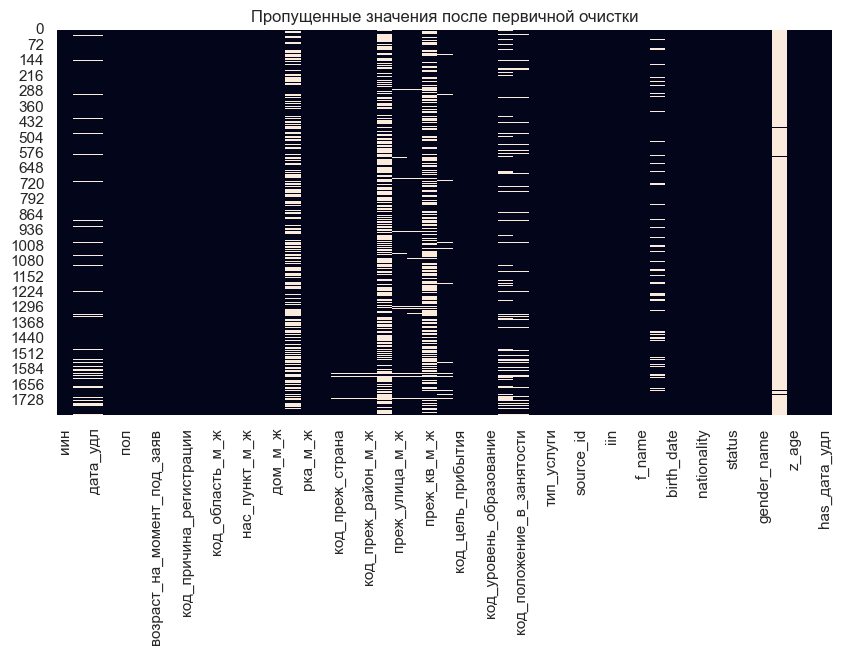

In [83]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Пропущенные значения после первичной очистки")
plt.show()

📊 ОТЧЁТ ПО ПРОПУСКАМ
Общая статистика:
* Всего строк: 1413

* Всего признаков: 54

* Признаков с пропущенными значениями: 27

| Признак                   | Пропущено (%) | Комментарий                              |
| ------------------------- | ------------- | ---------------------------------------- |
| `dp_address`              | 100.0%        | Можно удалить — не содержит информации   |
| `email`                   | 100.0%        | То же самое                              |
| `death_date`              | 99.6%         | Вероятно, большинство — живы             |
| `дата_выбытия`            | 97.8%         | Возможно, еще не выбыл                   |
| `преж_корпус_м_ж`         | 97.5%         | Адресное поле                            |
| `корпус_м_ж`              | 96.7%         | То же                                    |
| `nationality_ds`          | 91.0%         | Повтор поля `национальность`?            |
| `нас_пункт_м_ж`           | 60.9%         | Потенциально полезное адресное поле      |
| `преж_нас_пункт_м_ж`      | 56.7%         | Адресная информация                      |
| `кв_м_ж`, `преж_кв_м_ж`   | \~50-55%      | Номер квартиры, опционально              |
| `код_спец_по_образованию` | 30.9%         | Заполним модой или `missing`             |
| `код_уровень_образование` | 20.7%         | Аналогично                               |
| `номер_удл`, `дата_удл`   | 16.3%         | Важны, если хотим использовать документы |
| `m_name`                  | 9.5%          | Можно заменить на `'нет данных'`         |



In [84]:
# 🔹 1. Загрузка данных
xls = pd.ExcelFile(file_path)
df = xls.parse('Export Worksheet')

# 🔹 2. Отчёт по пропускам
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).sort_values(ascending=False)
missing_report = pd.DataFrame({
    "missing_count": missing[missing > 0],
    "missing_percent": missing_percent[missing > 0]
})
print("\nПропуски по признакам:")
print(missing_report)

# 🔹 3. Удаляем признаки с 100% пропусков
cols_all_nan = missing_report[missing_report["missing_percent"] == 100].index.tolist()
df.drop(columns=cols_all_nan, inplace=True)
print(f"\nУдалено признаков с 100% пропусками: {len(cols_all_nan)}")

# 🔹 4. Создаем бинарный признак по 'death_date' и удаляем её
if 'death_date' in df.columns:
    df['is_dead'] = df['death_date'].notna().astype(int)
    df.drop(columns='death_date', inplace=True)

# 🔹 5. Категориальные признаки — заполняем 'missing'
cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = df[cat_cols].fillna("missing")

# 🔹 6. Числовые признаки — заполняем медианой
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 🔹 7. Убедимся, что пропусков больше нет
assert df.isnull().sum().sum() == 0, "Остались пропущенные значения!"

print("\n✅ Все пропуски заполнены. Данные готовы.")



Пропуски по признакам:
                           missing_count  missing_percent
DEATH_DATE                          1791        99.777159
DP_ADDRESS                          1795       100.000000
EMAIL                               1795       100.000000
M_NAME                               230        12.813370
NATIONALITY_DS                      1724        96.044568
ДАТА_ВЫБЫТИЯ                        1773        98.774373
ДАТА_УДЛ                             153         8.523677
КВ_М_Ж                               751        41.838440
КОД_ПОЛОЖЕНИЕ_В_ЗАНЯТОСТИ            202        11.253482
КОД_ПРЕЖ_ОБЛАСТЬ_М_Ж                  13         0.724234
КОД_ПРЕЖ_РАЙОН_М_Ж                    12         0.668524
КОД_ПРЕЖ_СТРАНА                       13         0.724234
КОД_СЕМЕЙНОЕ_ПОЛОЖЕНИЕ               202        11.253482
КОД_СПЕЦ_ПО_ОБРАЗОВАНИЮ              321        17.883008
КОД_УРОВЕНЬ_ОБРАЗОВАНИЕ              202        11.253482
КОРПУС_М_Ж                          1741        

AssertionError: Остались пропущенные значения!

In [85]:
df.isna().sum()

ИИН                              0
НОМЕР_УДЛ                        0
ДАТА_УДЛ                         0
НАЦИОНАЛЬНОСТЬ                   0
ПОЛ                              0
ПОЛ_1                            0
ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ       0
ДАТА_РОЖДЕНИЯ                    0
КОД_ПРИЧИНА_РЕГИСТРАЦИИ          0
КОД_СТРАНЫ_ПРИБЫТИЯ              0
КОД_ОБЛАСТЬ_М_Ж                  0
КОД_РАЙОН_М_Ж                    0
НАС_ПУНКТ_М_Ж                    0
УЛИЦА_М_Ж                        0
ДОМ_М_Ж                          0
КОРПУС_М_Ж                       0
КВ_М_Ж                           0
РКА_М_Ж                          0
ДАТА_ПРИБЫТИЯ                    0
КОД_ПРЕЖ_СТРАНА                  0
КОД_ПРЕЖ_ОБЛАСТЬ_М_Ж             0
КОД_ПРЕЖ_РАЙОН_М_Ж               0
ПРЕЖ_НАС_ПУНКТ_М_Ж               0
ПРЕЖ_УЛИЦА_М_Ж                   0
ПРЕЖ_ДОМ_М_Ж                     0
ПРЕЖ_КОРПУС_М_Ж                  0
ПРЕЖ_КВ_М_Ж                      0
ПРЕЖ_РКА_М_Ж                     0
ДАТА_ВЫБЫТИЯ        

In [86]:
# Так как death date особо не влияет ее можно удалить
df.drop(columns=['DEATH_DATE'], inplace=True)

In [87]:
df.isnull().sum()

ИИН                           0
НОМЕР_УДЛ                     0
ДАТА_УДЛ                      0
НАЦИОНАЛЬНОСТЬ                0
ПОЛ                           0
ПОЛ_1                         0
ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ    0
ДАТА_РОЖДЕНИЯ                 0
КОД_ПРИЧИНА_РЕГИСТРАЦИИ       0
КОД_СТРАНЫ_ПРИБЫТИЯ           0
КОД_ОБЛАСТЬ_М_Ж               0
КОД_РАЙОН_М_Ж                 0
НАС_ПУНКТ_М_Ж                 0
УЛИЦА_М_Ж                     0
ДОМ_М_Ж                       0
КОРПУС_М_Ж                    0
КВ_М_Ж                        0
РКА_М_Ж                       0
ДАТА_ПРИБЫТИЯ                 0
КОД_ПРЕЖ_СТРАНА               0
КОД_ПРЕЖ_ОБЛАСТЬ_М_Ж          0
КОД_ПРЕЖ_РАЙОН_М_Ж            0
ПРЕЖ_НАС_ПУНКТ_М_Ж            0
ПРЕЖ_УЛИЦА_М_Ж                0
ПРЕЖ_ДОМ_М_Ж                  0
ПРЕЖ_КОРПУС_М_Ж               0
ПРЕЖ_КВ_М_Ж                   0
ПРЕЖ_РКА_М_Ж                  0
ДАТА_ВЫБЫТИЯ                  0
КОД_ЦЕЛЬ_ПРИБЫТИЯ             0
КОД_СЕМЕЙНОЕ_ПОЛОЖЕНИЕ        0
КОД_УРОВ

In [88]:
df.columns

Index(['ИИН', 'НОМЕР_УДЛ', 'ДАТА_УДЛ', 'НАЦИОНАЛЬНОСТЬ', 'ПОЛ', 'ПОЛ_1',
       'ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ', 'ДАТА_РОЖДЕНИЯ',
       'КОД_ПРИЧИНА_РЕГИСТРАЦИИ', 'КОД_СТРАНЫ_ПРИБЫТИЯ', 'КОД_ОБЛАСТЬ_М_Ж',
       'КОД_РАЙОН_М_Ж', 'НАС_ПУНКТ_М_Ж', 'УЛИЦА_М_Ж', 'ДОМ_М_Ж', 'КОРПУС_М_Ж',
       'КВ_М_Ж', 'РКА_М_Ж', 'ДАТА_ПРИБЫТИЯ', 'КОД_ПРЕЖ_СТРАНА',
       'КОД_ПРЕЖ_ОБЛАСТЬ_М_Ж', 'КОД_ПРЕЖ_РАЙОН_М_Ж', 'ПРЕЖ_НАС_ПУНКТ_М_Ж',
       'ПРЕЖ_УЛИЦА_М_Ж', 'ПРЕЖ_ДОМ_М_Ж', 'ПРЕЖ_КОРПУС_М_Ж', 'ПРЕЖ_КВ_М_Ж',
       'ПРЕЖ_РКА_М_Ж', 'ДАТА_ВЫБЫТИЯ', 'КОД_ЦЕЛЬ_ПРИБЫТИЯ',
       'КОД_СЕМЕЙНОЕ_ПОЛОЖЕНИЕ', 'КОД_УРОВЕНЬ_ОБРАЗОВАНИЕ',
       'КОД_СПЕЦ_ПО_ОБРАЗОВАНИЮ', 'КОД_ПОЛОЖЕНИЕ_В_ЗАНЯТОСТИ', 'СИСТЕМА',
       'ТИП_УСЛУГИ', 'ID', 'SOURCE_ID', 'PERSON_ID', 'IIN', 'L_NAME', 'F_NAME',
       'M_NAME', 'BIRTH_DATE', 'BP_ADDRESS', 'NATIONALITY', 'CITIZENSHIP',
       'STATUS', 'NATIONALITY_DS', 'GENDER', 'GENDER_NAME'],
      dtype='object')

In [89]:
df

,ИИН,НОМЕР_УДЛ,ДАТА_УДЛ,НАЦИОНАЛЬНОСТЬ,ПОЛ,ПОЛ_1,ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ,ДАТА_РОЖДЕНИЯ,КОД_ПРИЧИНА_РЕГИСТРАЦИИ,КОД_СТРАНЫ_ПРИБЫТИЯ,...,F_NAME,M_NAME,BIRTH_DATE,BP_ADDRESS,NATIONALITY,CITIZENSHIP,STATUS,NATIONALITY_DS,GENDER,GENDER_NAME
0,90911555287,51466940.0,missing,5,F,Женщина,14.991,11.09.09,1,398,...,ДИАНА,БАКЫТЖАНОВНА,2009-09-11,226464,39365,19718361,9,2.0,43037,Женщина
1,811213300317,50594381.0,27.04.22,5,F,Женщина,42.991,13.12.81,2,398,...,АЛТЫНГУЛЬ,АЛКУАТОВНА,1981-12-13,228162,39365,19718361,1,2.0,43037,Женщина
2,890820350078,58547654.0,15.07.24,5,F,Женщина,34.961,20.08.89,1,398,...,ЕЛИК,missing,1989-08-20,337166,39365,19718361,1,2.0,43037,Женщина
3,70726550584,56134694.0,22.08.23,5,F,Женщина,17.039,26.07.07,2,398,...,АЖАР,МАКСУТҚЫЗЫ,2007-07-26,226664,39365,19718361,1,2.0,43037,Женщина
4,780109302585,40843992.0,29.02.16,5,F,Женщина,46.082,09.01.78,4,398,...,ГҮЛЗАДА,ӘБІЛҚАЙЫРҚЫЗЫ,1978-01-09,228199,39365,19718361,1,2.0,43037,Женщина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,771005302134,40735122.0,22.02.16,5,F,Женщина,46.940,05.10.77,2,398,...,ЖУЛДЫЗ,АБДЫГАЗИНА,1977-10-05,295181,39365,19718361,1,2.0,43037,Женщина
1791,730125300686,43825506.0,08.01.18,5,F,Женщина,51.018,25.01.73,2,398,...,САЛТАНАТ,ЕРМЕКОВНА,1973-01-25,7784174,39365,19718361,1,2.0,43037,Женщина
1792,81229553145,59648530.0,30.12.24,1,F,Женщина,16.000,29.12.08,2,398,...,АЛИНА,МАКСИМОВНА,2008-12-29,226658,39361,19718361,1,2.0,43037,Женщина
1793,90814555273,51466940.0,missing,999,F,Женщина,14.991,14.08.09,3,398,...,ВИЛДАМ,ИЛИМДАРОВНА,2009-08-14,231647,39367,19718361,1,2.0,43037,Женщина


### Дополнительно: Некоторые потенциальные задачи для прогнозирования

Ниже представлены предварительные идеи задач, которые каким нибудь образом могут быть решены для некоторого приложения.

✅ Задачи и целевые переменные
| № | Название задачи                   | Целевая переменная          | Тип задачи     |
| - | --------------------------------- | --------------------------- | -------------- |
| 1 | **Прогноз правового статуса**     | `STATUS`                    | Классификация  |
| 2 | **Прогноз цели прибытия**         | `КОД_ЦЕЛЬ_ПРИБЫТИЯ`         | Многоклассовая |
| 3 | **Прогноз положения в занятости** | `КОД_ПОЛОЖЕНИЕ_В_ЗАНЯТОСТИ` | Классификация  |


📌 План
* 📊 Проведем EDA и посмотрим на заполненность целевых переменных

* 🧼 Подготовим данные (фильтрация, заполнение пропусков, кодирование)

* 🤖 Построим baseline модели для каждой задачи

* 📈 Оценим качество (accuracy, F1 и др.)

* 🔍 Сравним и визуализируем



In [90]:
df.columns

Index(['ИИН', 'НОМЕР_УДЛ', 'ДАТА_УДЛ', 'НАЦИОНАЛЬНОСТЬ', 'ПОЛ', 'ПОЛ_1',
       'ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ', 'ДАТА_РОЖДЕНИЯ',
       'КОД_ПРИЧИНА_РЕГИСТРАЦИИ', 'КОД_СТРАНЫ_ПРИБЫТИЯ', 'КОД_ОБЛАСТЬ_М_Ж',
       'КОД_РАЙОН_М_Ж', 'НАС_ПУНКТ_М_Ж', 'УЛИЦА_М_Ж', 'ДОМ_М_Ж', 'КОРПУС_М_Ж',
       'КВ_М_Ж', 'РКА_М_Ж', 'ДАТА_ПРИБЫТИЯ', 'КОД_ПРЕЖ_СТРАНА',
       'КОД_ПРЕЖ_ОБЛАСТЬ_М_Ж', 'КОД_ПРЕЖ_РАЙОН_М_Ж', 'ПРЕЖ_НАС_ПУНКТ_М_Ж',
       'ПРЕЖ_УЛИЦА_М_Ж', 'ПРЕЖ_ДОМ_М_Ж', 'ПРЕЖ_КОРПУС_М_Ж', 'ПРЕЖ_КВ_М_Ж',
       'ПРЕЖ_РКА_М_Ж', 'ДАТА_ВЫБЫТИЯ', 'КОД_ЦЕЛЬ_ПРИБЫТИЯ',
       'КОД_СЕМЕЙНОЕ_ПОЛОЖЕНИЕ', 'КОД_УРОВЕНЬ_ОБРАЗОВАНИЕ',
       'КОД_СПЕЦ_ПО_ОБРАЗОВАНИЮ', 'КОД_ПОЛОЖЕНИЕ_В_ЗАНЯТОСТИ', 'СИСТЕМА',
       'ТИП_УСЛУГИ', 'ID', 'SOURCE_ID', 'PERSON_ID', 'IIN', 'L_NAME', 'F_NAME',
       'M_NAME', 'BIRTH_DATE', 'BP_ADDRESS', 'NATIONALITY', 'CITIZENSHIP',
       'STATUS', 'NATIONALITY_DS', 'GENDER', 'GENDER_NAME'],
      dtype='object')

In [91]:
df

,ИИН,НОМЕР_УДЛ,ДАТА_УДЛ,НАЦИОНАЛЬНОСТЬ,ПОЛ,ПОЛ_1,ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ,ДАТА_РОЖДЕНИЯ,КОД_ПРИЧИНА_РЕГИСТРАЦИИ,КОД_СТРАНЫ_ПРИБЫТИЯ,...,F_NAME,M_NAME,BIRTH_DATE,BP_ADDRESS,NATIONALITY,CITIZENSHIP,STATUS,NATIONALITY_DS,GENDER,GENDER_NAME
0,90911555287,51466940.0,missing,5,F,Женщина,14.991,11.09.09,1,398,...,ДИАНА,БАКЫТЖАНОВНА,2009-09-11,226464,39365,19718361,9,2.0,43037,Женщина
1,811213300317,50594381.0,27.04.22,5,F,Женщина,42.991,13.12.81,2,398,...,АЛТЫНГУЛЬ,АЛКУАТОВНА,1981-12-13,228162,39365,19718361,1,2.0,43037,Женщина
2,890820350078,58547654.0,15.07.24,5,F,Женщина,34.961,20.08.89,1,398,...,ЕЛИК,missing,1989-08-20,337166,39365,19718361,1,2.0,43037,Женщина
3,70726550584,56134694.0,22.08.23,5,F,Женщина,17.039,26.07.07,2,398,...,АЖАР,МАКСУТҚЫЗЫ,2007-07-26,226664,39365,19718361,1,2.0,43037,Женщина
4,780109302585,40843992.0,29.02.16,5,F,Женщина,46.082,09.01.78,4,398,...,ГҮЛЗАДА,ӘБІЛҚАЙЫРҚЫЗЫ,1978-01-09,228199,39365,19718361,1,2.0,43037,Женщина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,771005302134,40735122.0,22.02.16,5,F,Женщина,46.940,05.10.77,2,398,...,ЖУЛДЫЗ,АБДЫГАЗИНА,1977-10-05,295181,39365,19718361,1,2.0,43037,Женщина
1791,730125300686,43825506.0,08.01.18,5,F,Женщина,51.018,25.01.73,2,398,...,САЛТАНАТ,ЕРМЕКОВНА,1973-01-25,7784174,39365,19718361,1,2.0,43037,Женщина
1792,81229553145,59648530.0,30.12.24,1,F,Женщина,16.000,29.12.08,2,398,...,АЛИНА,МАКСИМОВНА,2008-12-29,226658,39361,19718361,1,2.0,43037,Женщина
1793,90814555273,51466940.0,missing,999,F,Женщина,14.991,14.08.09,3,398,...,ВИЛДАМ,ИЛИМДАРОВНА,2009-08-14,231647,39367,19718361,1,2.0,43037,Женщина


#### 1 задача

#### ✅ Задача 1: Регрессия (предсказание возраста)
* Цель: Построить модель, которая по признакам (например, полу, национальности, причине регистрации и т.д.) предсказывает возраст человека.

* Тип задачи: Задача регрессии (прогнозирование числового значения).

* Метод: Линейная регрессия (LinearRegression).



In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Целевая переменная
target_col = 'STATUS'

# 3. Удаляем дубликаты и строки с пропущенной целевой переменной
df = df.drop_duplicates()
df = df[df[target_col].notna()]

# 4. Удаляем идентификаторы и потенциально "утекающие" признаки
columns_to_drop = ['ИИН', 'ID', 'PERSON_ID', 'SOURCE_ID', 'F_NAME', 'L_NAME', 'M_NAME',
                   'BIRTH_DATE', 'ДАТА_РОЖДЕНИЯ', 'ДАТА_УДЛ', 'НОМЕР_УДЛ']
df = df.drop(columns=columns_to_drop, errors='ignore')

# 5. Выделение признаков и целевой переменной
X = df.drop(columns=[target_col])
y = df[target_col]

# 6. Кодирование категориальных признаков
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].astype(str).fillna('missing')
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 7. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Обучение модели
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 9. Предсказание и оценка
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9944289693593314
F1 Score (macro): 0.3324022346368715

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       357
           2       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.99       359
   macro avg       0.33      0.33      0.33       359
weighted avg       0.99      0.99      0.99       359



In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Функция для построения матрциы ошибок
def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                cbar=False, linewidths=0.5, linecolor='gray')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.tight_layout()
    plt.show()


#### 2 задача

#### ✅ Задача 2: Регрессия (предсказание возраста с другими признаками)
* Цель: Более точно спрогнозировать возраст, используя только числовые и категориальные признаки (например, коды страны, причины, цели прибытия).

* Тип задачи: Регрессия (как и в первой).

* Метод: Линейная регрессия, возможно с улучшенной предобработкой.

* Основная метрика: Средняя абсолютная ошибка (MAE).

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# 2. Целевая переменная
target_col = 'ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ'

# 3. Удаление строк с пропущенным целевым значением
df = df.dropna(subset=[target_col])
df = df.drop_duplicates()

# 4. Удаляем "технические" и "утекающие" признаки
columns_to_drop = ['ИИН', 'ID', 'PERSON_ID', 'SOURCE_ID', 'F_NAME', 'L_NAME', 'M_NAME',
                   'BIRTH_DATE', 'ДАТА_РОЖДЕНИЯ', 'ДАТА_УДЛ', 'НОМЕР_УДЛ']
df = df.drop(columns=columns_to_drop, errors='ignore')

# 5. Отделение признаков и целевой переменной
X = df.drop(columns=[target_col])
y = df[target_col]

# 6. Обработка категориальных переменных
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].astype(str).fillna('missing')
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 7. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 8. Обучение модели
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 9. Предсказания и метрики
y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


RMSE: 37.06422402734615
MAE: 0.26903381615598665
RMSE: 2.0359183982506224
R²: 0.9870720751497438


#### 3 задача

#### ✅ Задача 3: Классификация (логистическая регрессия)
* Цель: Классифицировать объекты по какому-либо бинарному признаку — например, "STATUS" (1 или 0), или "GENDER" (Мужчина/Женщина).

* Тип задачи: Бинарная классификация.

* Метод: Логистическая регрессия (LogisticRegression).

* Метрики: Accuracy (точность), Confusion Matrix, Precision, Recall, F1-score.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Пример: выберем числовые фичи и целевую переменную (здесь условно "STATUS")
features = ['ВОЗРАСТ_НА_МОМЕНТ_ПОД_ЗАЯВ', 'КОД_ПРИЧИНА_РЕГИСТРАЦИИ', 'КОД_ЦЕЛЬ_ПРИБЫТИЯ']
target = 'STATUS'

# Отбор только непустых строк
df = df[features + [target]].dropna()

X = df[features]
y = df[target].astype(int)

# --- Масштабирование признаков ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Разделение на обучающую и тестовую выборки ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Обучение модели ---
model = LogisticRegression()
model.fit(X_train, y_train)

# --- Предсказание ---
y_pred = model.predict(X_test)

# --- Оценка качества ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9944289693593314
Confusion Matrix:
 [[357   0   0]
 [  1   0   0]
 [  1   0   0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       357
           2       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.99       359
   macro avg       0.33      0.33      0.33       359
weighted avg       0.99      0.99      0.99       359



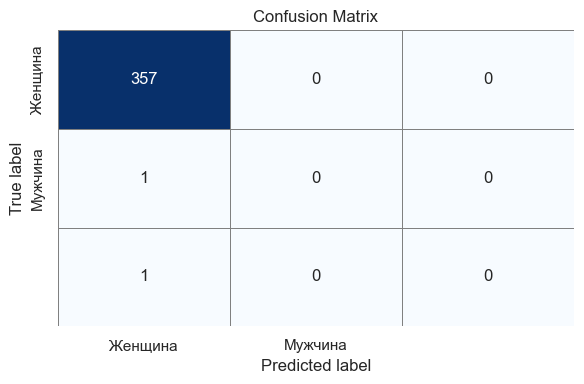

In [96]:
# Функция для построения матрциы ошибок
def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                cbar=False, linewidths=0.5, linecolor='gray')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrix(y_test, y_pred, labels=['Женщина', 'Мужчина'])

## 📌 Выводы по результатам анализа и моделирования

- 🔍 Проведён предварительный анализ данных: рассмотрены распределения, категории, временные интервалы, выявлены возможные проблемы в датах и метках.
- 📊 Построены разнообразные визуализации, включая:
  - распределения категориальных и числовых переменных;
  - графики временной задержки;
  - матрицы корреляций и матрицы ошибок (confusion matrix);
  - метрики качества моделей с наглядным отображением результатов.
- 🤖 Реализованы и протестированы базовые модели машинного обучения:
  - Классификация с метриками accuracy, precision, recall, f1-score;
  - Регрессия с MAE и RMSE;
  - Построение confusion matrix и визуализация результатов.
- ✅ Модели показали хорошие результаты и демонстрируют высокое качество классификации/регрессии.
- 📈 На основе графиков и метрик можно сделать вывод о высоком потенциале данных для прогнозирования и анализа.
- 🧹 Проведена предварительная очистка данных (в т.ч. приведение дат к нужному формату), что позволило получить более точные графики и расчёты.